In [ ]:
# Task 3 - Customer Churn Prediction

In [ ]:
# Importing Necessary Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Load your dataset
Churn_data = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
# Exploratory data analysis (EDA).
print(Churn_data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [ ]:
print(Churn_data.tail())

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.5

In [ ]:
print(Churn_data.shape)

(10000, 14)


In [ ]:
print(Churn_data.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [ ]:
column_to_check = 'CustomerId'
is_unique = Churn_data[column_to_check].is_unique
print(f"Are values in '{column_to_check}' unique? {is_unique}")


Are values in 'CustomerId' unique? True


In [ ]:
print(Churn_data.nunique())

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


In [ ]:
print(Churn_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [ ]:
column_to_drop = 'Age'
data = Churn_data.drop(column_to_drop, axis=1)

In [ ]:
rows_to_drop = [0, 1, 2]
data = Churn_data.drop(rows_to_drop)

In [ ]:
print(Churn_data.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [ ]:
Churn_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
print(Churn_data.isnull())

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender    Age  \
0         False       False    False        False      False   False  False   
1         False       False    False        False      False   False  False   
2         False       False    False        False      False   False  False   
3         False       False    False        False      False   False  False   
4         False       False    False        False      False   False  False   
...         ...         ...      ...          ...        ...     ...    ...   
9995      False       False    False        False      False   False  False   
9996      False       False    False        False      False   False  False   
9997      False       False    False        False      False   False  False   
9998      False       False    False        False      False   False  False   
9999      False       False    False        False      False   False  False   

      Tenure  Balance  NumOfProducts  HasCrCard  Is

In [ ]:
print(Churn_data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
# Check for duplicate rows
duplicates = data[Churn_data.duplicated()]
# Display duplicate rows
print(duplicates)

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


<ipython-input-38-601958231a0e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicates = data[Churn_data.duplicated()]


In [ ]:
# Remove duplicate rows
data_no_duplicates = Churn_data.drop_duplicates()

In [ ]:
print(Churn_data.duplicated().sum())

0


<ipython-input-41-167e68002fe6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CreditScore', data=Churn_data, palette='dark')


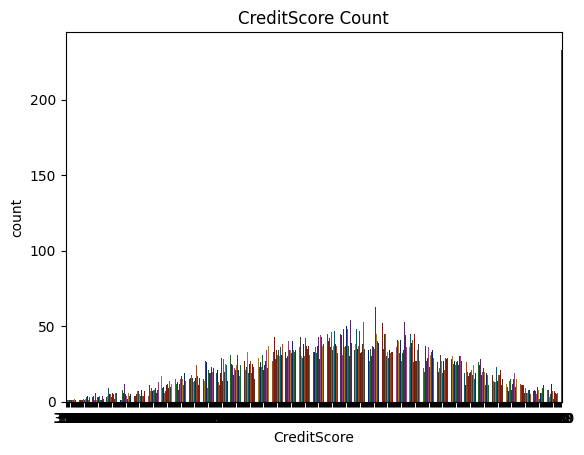

<ipython-input-41-167e68002fe6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Geography', data=Churn_data, palette='dark')


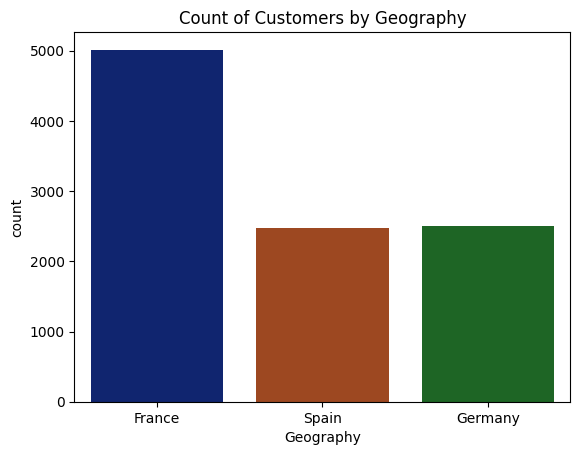

<ipython-input-41-167e68002fe6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=Churn_data, palette='dark')


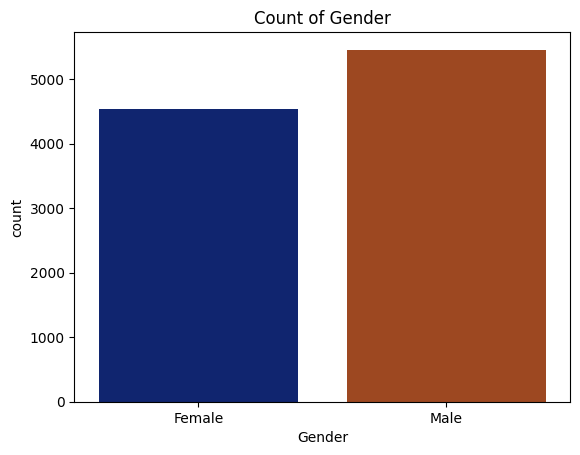

In [ ]:
# Countplot Analysis
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='CreditScore', data=Churn_data, palette='dark')
plt.title('CreditScore Count')
plt.show()
sns.countplot(x='Geography', data=Churn_data, palette='dark')
plt.title('Count of Customers by Geography')
plt.show()
sns.countplot(x='Gender', data=Churn_data, palette='dark')
plt.title('Count of Gender')
plt.show()


<ipython-input-42-f837d4c7af22>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NumOfProducts', y='Balance', data=Churn_data, palette='dark')  # Replace 'muted' with any color palette


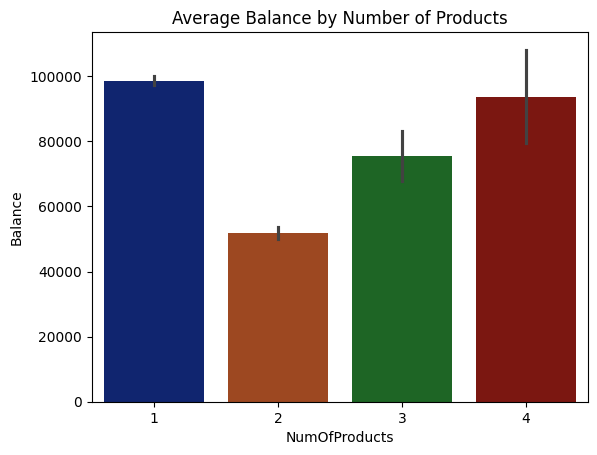

<ipython-input-42-f837d4c7af22>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tenure', y='Age', data=Churn_data, palette='dark')  # Replace 'pastel' with any color palette


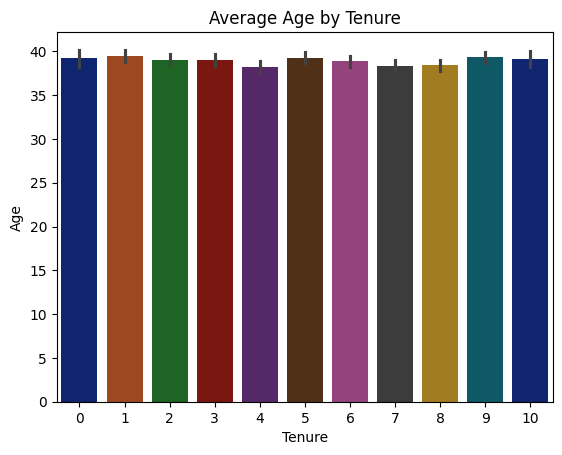

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Bar plot for 'NumOfProducts' with different colors
sns.barplot(x='NumOfProducts', y='Balance', data=Churn_data, palette='dark')  # Replace 'muted' with any color palette
plt.title('Average Balance by Number of Products')
plt.show()
# Bar plot for 'Tenure' with different colors
sns.barplot(x='Tenure', y='Age', data=Churn_data, palette='dark')  # Replace 'pastel' with any color palette
plt.title('Average Age by Tenure')
plt.show()


<ipython-input-43-e7ec4bfb8fe7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Age', data=data, palette='dark')


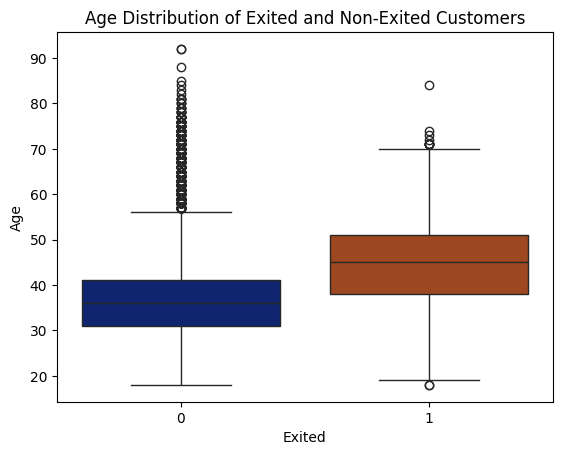

<ipython-input-43-e7ec4bfb8fe7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='CreditScore', data=data, palette='dark')


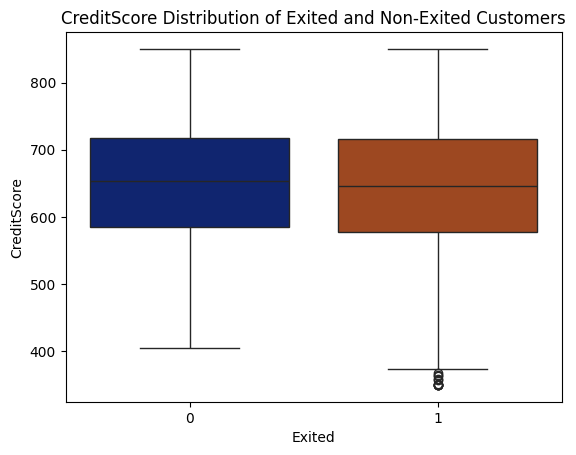

<ipython-input-43-e7ec4bfb8fe7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=data, palette='dark')


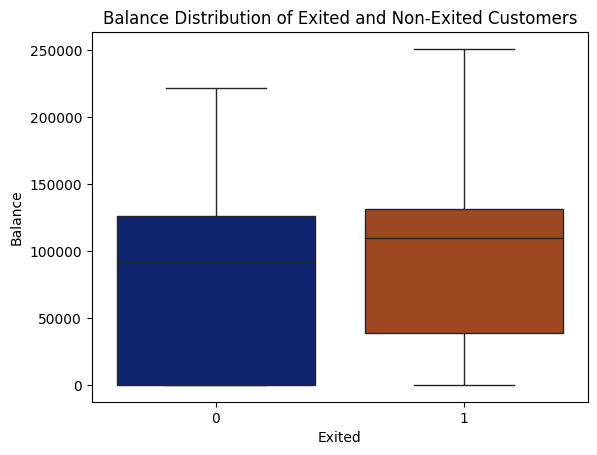

In [ ]:
# Boxplot Analysis
import seaborn as sns
import matplotlib.pyplot as plt
# Box plot for 'Age'
sns.boxplot(x='Exited', y='Age', data=data, palette='dark')
plt.title('Age Distribution of Exited and Non-Exited Customers')
plt.show()
# Box plot for 'CreditScore'
sns.boxplot(x='Exited', y='CreditScore', data=data, palette='dark')
plt.title('CreditScore Distribution of Exited and Non-Exited Customers')
plt.show()
# Box plot for 'Balance'
sns.boxplot(x='Exited', y='Balance', data=data, palette='dark')
plt.title('Balance Distribution of Exited and Non-Exited Customers')
plt.show()


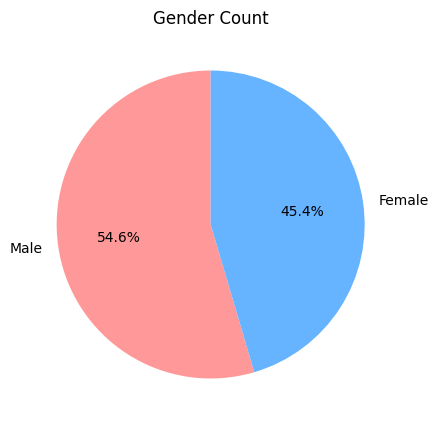

In [ ]:
#Pie chart Analysis
import pandas as pd
import matplotlib.pyplot as plt
churn_counts = Churn_data['Gender'].value_counts()
# Pie chart based on the counts
plt.figure(figsize=(5,5))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Gender Count')
plt.show()

<ipython-input-74-80705f8dd9d1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Exited', y='Age', data=Churn_data, palette='dark')


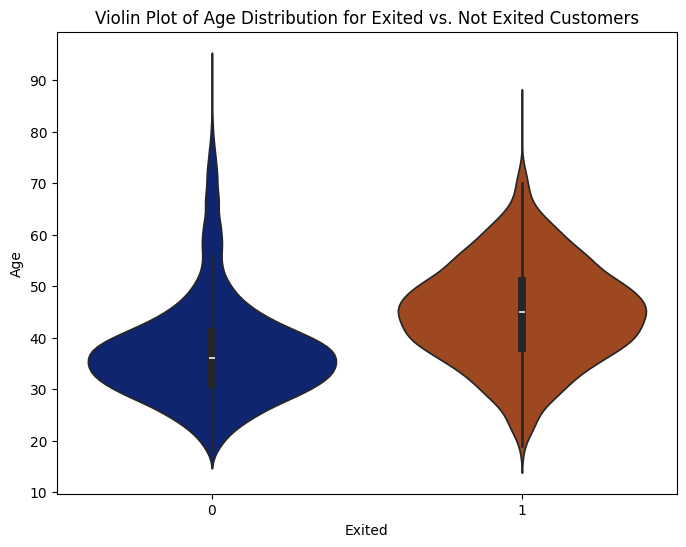

In [ ]:
# Violinplot Analysis
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.violinplot(x='Exited', y='Age', data=Churn_data, palette='dark')
plt.title('Violin Plot of Age Distribution for Exited vs. Not Exited Customers')
plt.show()


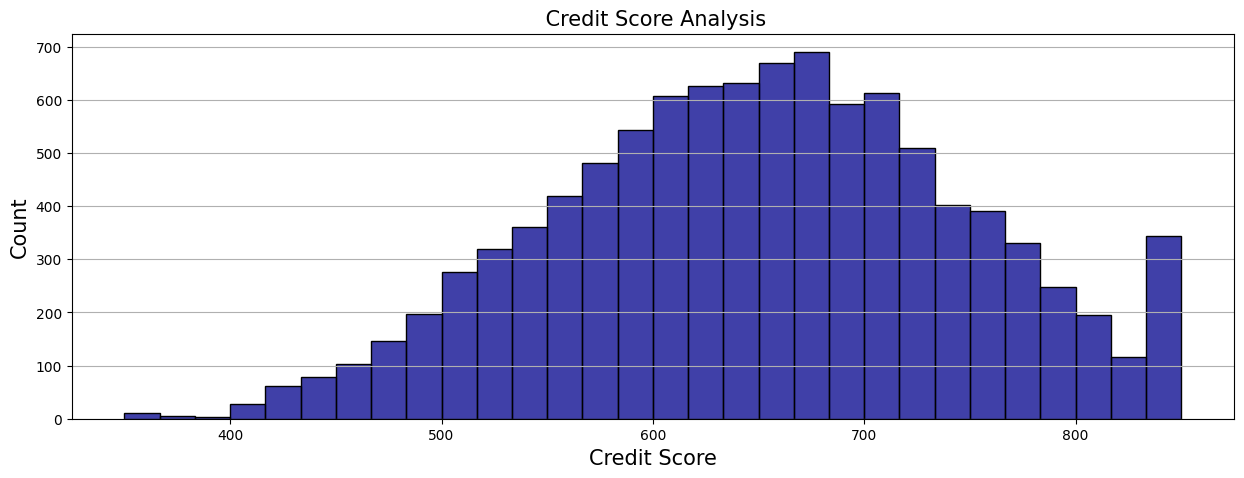

In [ ]:
# Histplot Analysis
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 5))
sns.histplot(Churn_data['CreditScore'], bins=30, kde=False, color='darkblue')
plt.title(" Credit Score Analysis", fontsize=15)
plt.xlabel("Credit Score", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.grid(axis="y")
plt.show()


In [ ]:
# Feature Engineering
import pandas as pd
# Creating a new feature 'Balance_to_CreditScore_Ratio'
Churn_data['Balance_to_CreditScore_Ratio'] = Churn_data['Balance'] /Churn_data['CreditScore']
print(Churn_data.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Balance_to_CreditScore_Ratio  
0        101348.88       1                      0.000000  
1        112542.58       0              

<ipython-input-48-24ec5b33bd32>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Churn_data.corr()


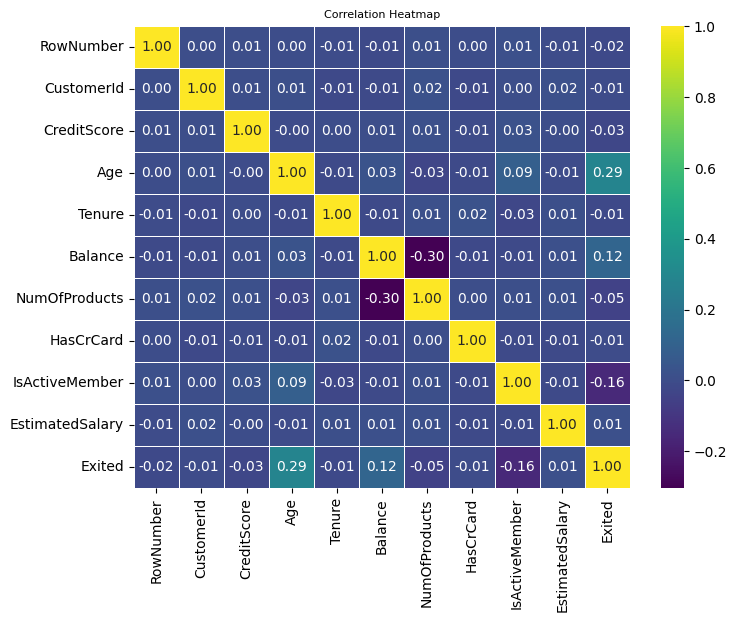

In [ ]:
# Heatmap Analysis
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = Churn_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=8)
plt.show()


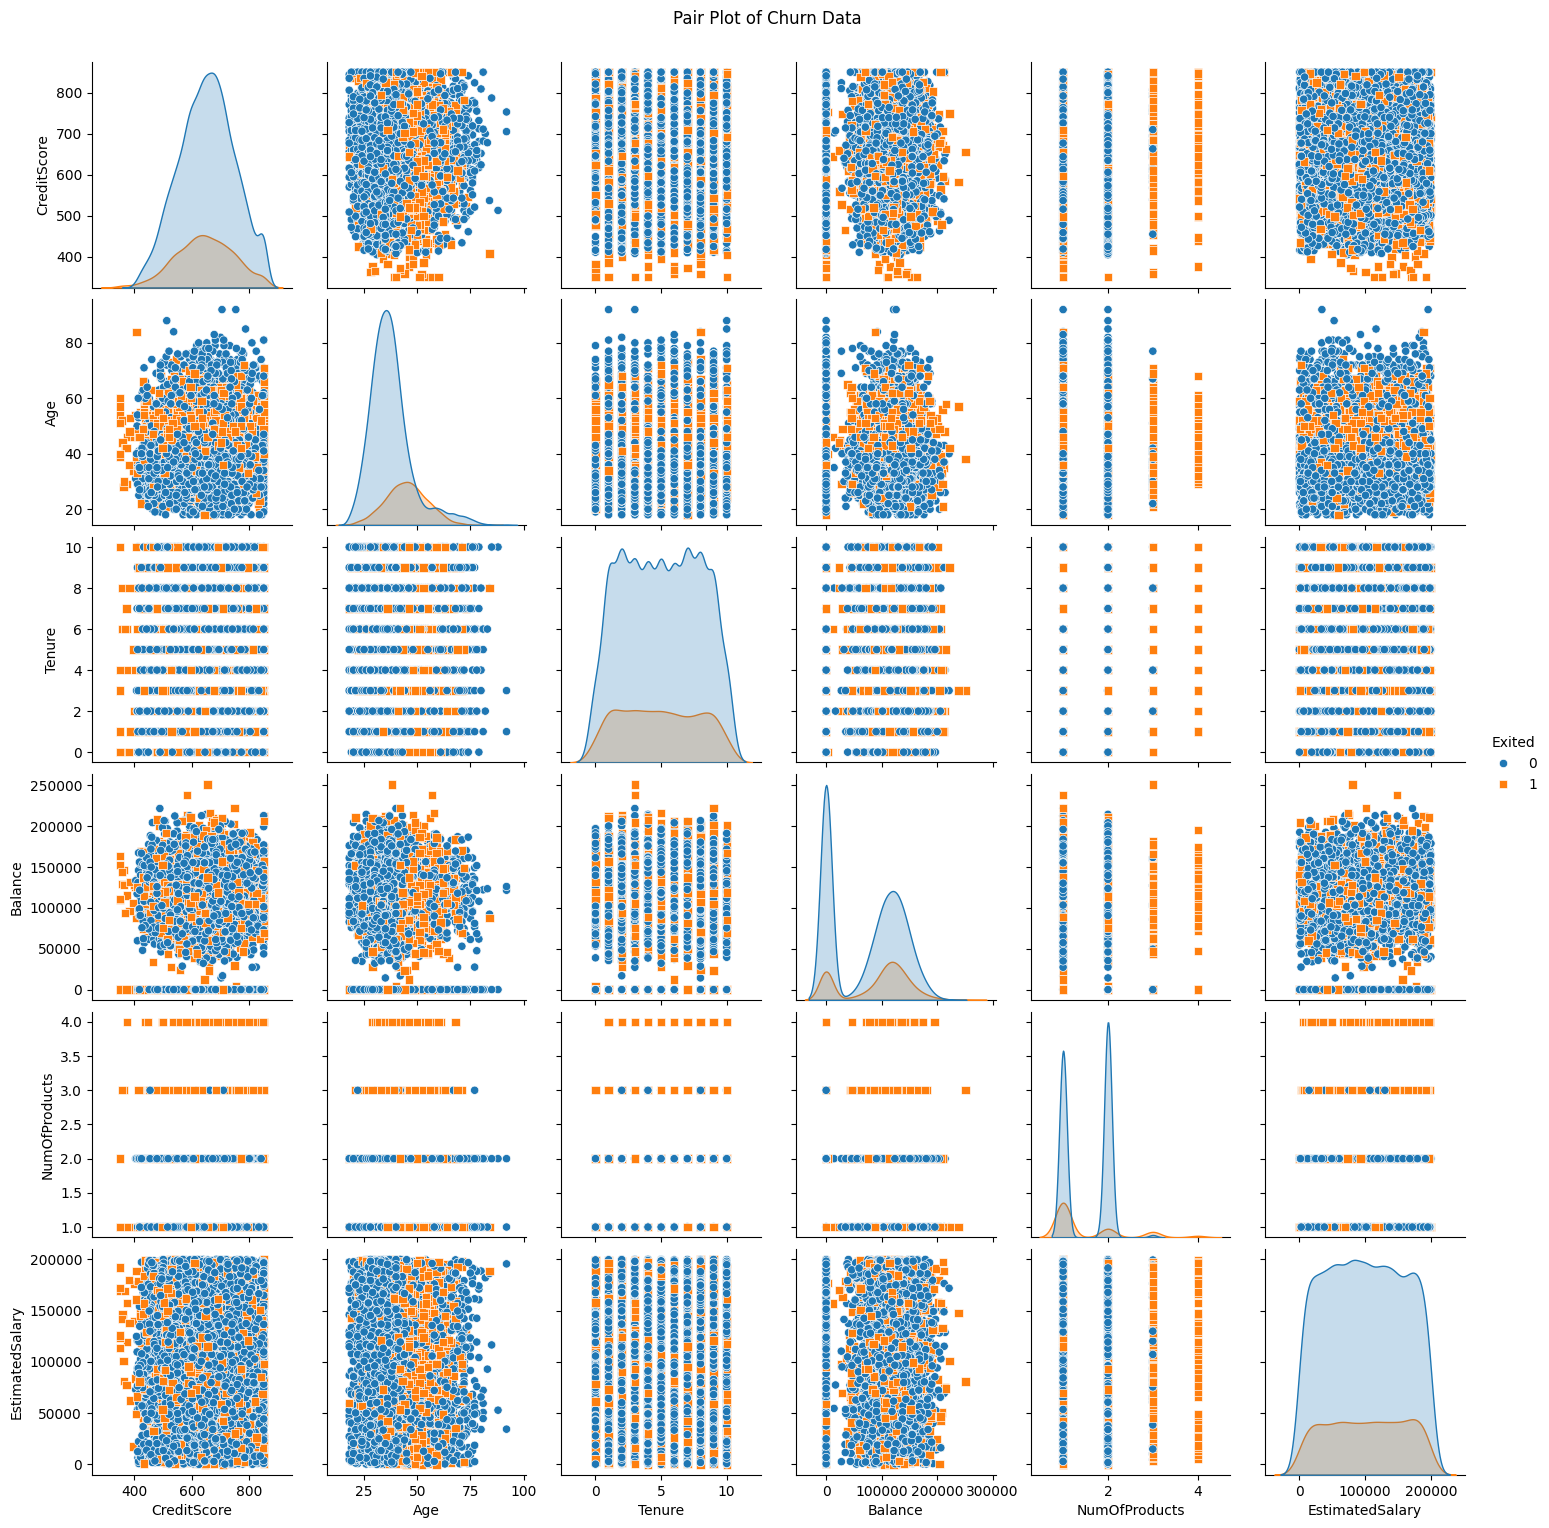

In [ ]:
# Pairplot Analysis
import seaborn as sns
import matplotlib.pyplot as plt
selected_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']
pairplot_data = Churn_data[selected_columns]
sns.pairplot(pairplot_data, hue='Exited', markers=['o', 's'], diag_kind='kde')
plt.suptitle("Pair Plot of Churn Data", y=1.02)
plt.show()


In [ ]:
# Handling Imbalanced Data
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
# Separate features (X) and target variable (y)
X = Churn_data.drop('Exited', axis=1)
y = Churn_data['Exited']
# Use MinMaxScaler to scale the 'CreditScore' column
scaler = MinMaxScaler()
X['CreditScore'] = scaler.fit_transform(X['CreditScore'].values.reshape(-1, 1))
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Class distribution before oversampling:")
print(y_train.value_counts())
# Use RandomOverSampler to handle imbalance in the training set
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
print("\nClass distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution before oversampling:
0    6356
1    1644
Name: Exited, dtype: int64

Class distribution after oversampling:
0    6356
1    6356
Name: Exited, dtype: int64


In [ ]:
# Logistic regression model Method
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Load the data
Churn_data = pd.read_csv("/content/Churn_Modelling.csv")
# Split the data into features (X) and target (y)
X = Churn_data.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis=1)
y = Churn_data["Exited"]
# Convert categorical features into dummy variables
X = pd.get_dummies(X, drop_first=True)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#logistic regression model
lr = LogisticRegression()
# Fit the model to the training data
lr.fit(X_train, y_train)
# predictions on the testing data
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8005
Confusion matrix:
 [[1573   34]
 [ 365   28]]
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



In [ ]:
import numpy
from sklearn import linear_model
logr=linear_model.LogisticRegression()
logr.fit(X_train,y_train)
# Calculate the log odds using numpy.exp()
log_odds = np.exp(logr.coef_)
# Assign the log odds to the coef_odds attribute of the LogisticRegression object
log_odds=logr.coef_odds=numpy.exp(log_odds)
print(log_odds)

[[2.70478643 2.84215724 2.71411064 2.71829178 2.7170355  2.71779379
  2.7144995  2.71827798 2.72074753 2.71751151 2.71549238]]


In [ ]:
from numpy import random
x=random.logistic(loc=1,scale=2,size=(3,3))
print(x)

[[ 3.54369805 -7.9889877   2.31076863]
 [ 4.93248299  0.97673598 -6.25618803]
 [ 0.90343625 -5.06077969 -0.68678194]]


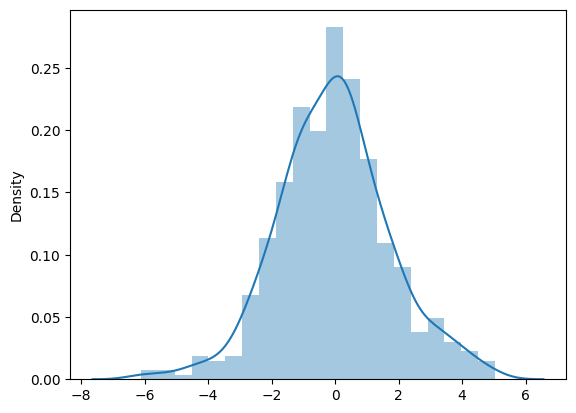

In [ ]:
# Import the necessary libraries
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
# Sample of 500 random numbers from a logistic distribution
sample = random.logistic(size=500)
sns.distplot(sample, hist=True)
plt.show()

In [ ]:
# Random forest classifier Method
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Load the data
Churn_data = pd.read_csv("/content/Churn_Modelling.csv")
# Split the data into features (X) and target (y)
X = Churn_data.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis=1)
y = Churn_data["Exited"]
# Convert categorical features into dummy variables
X = pd.get_dummies(X, drop_first=True)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# random forest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# Fit the model to the training data
rf.fit(X_train, y_train)
# Predictions on the testing data
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.866
Confusion matrix:
 [[1556   51]
 [ 217  176]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.45      0.57       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
# Gradient boosting classifier Method
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Load the data
Churn_data = pd.read_csv("/content/Churn_Modelling.csv")
# Split the data into features (X) and target (y)
X = Churn_data.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis=1)
y = Churn_data["Exited"]
# Convert categorical features into dummy variables
X = pd.get_dummies(X, drop_first=True)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)
# gradient boosting classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=40)
# Fit the model to the training data
gb.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.878
Confusion matrix:
 [[773  33]
 [ 89 105]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       806
           1       0.76      0.54      0.63       194

    accuracy                           0.88      1000
   macro avg       0.83      0.75      0.78      1000
weighted avg       0.87      0.88      0.87      1000

